In [1]:
# for creating a responsive plot
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import csv
from datetime import datetime
from os import mkdir, listdir

import pandas as pd

In [3]:
# -------- range of the variables ----------
range_D     = [0.5, 0.8]
range_AEdAO = [0.3, 1.05]
range_PdD   = [0.5, 1.4]
range_Z     = [2, 7]

list_Z = range(range_Z[0], range_Z[1]+1)

In [6]:
dir_name = 'gradients'
V_S = '7_0'
# V_S = '7_5'
# V_S = '8_0'
dir_name += '/'+V_S

In [7]:
# create dataframes from csv's
dfs = {}
for filename in listdir(dir_name):
    z = int(filename[0])
    filename = dir_name+'/'+filename
    dfs[z] = pd.read_csv(filename)
    # select only the collums
    # D, AEdAO, PdD, P_B
    dfs[z] = dfs[z].iloc[:, [0,1,2,4]]
    dfs[z] = dfs[z].set_axis(["D", "AEdAO", "PdD", "P_B"], axis=1)

In [8]:
dfs[4]

,D,AEdAO,PdD,P_B
0,0.575862,1.05,1.250000,0.0
1,0.575862,1.05,1.224138,0.0
2,0.575862,1.05,1.198276,0.0
3,0.575862,1.05,1.172414,0.0
4,0.575862,1.05,1.146552,0.0
...,...,...,...,...
26995,0.687931,0.50,0.603448,0.0
26996,0.687931,0.50,0.577586,0.0
26997,0.687931,0.50,0.551724,0.0
26998,0.687931,0.50,0.525862,0.0


In [9]:
# get only the rows in the data frames with P_B not null
dfs_P_B = {}
for z in dfs:
    dfs_P_B[z] = dfs[z].loc[dfs[z]['P_B'] > 0]
    dfs_P_B[z] = dfs_P_B[z].astype(float)  # convert to float
#     dfs_P_B[z] = dfs_P_B[z].loc[dfs_P_B[z]['P_B'] < 120]

In [10]:
dfs_P_B[4]

,D,AEdAO,PdD,P_B
140,0.593103,1.050000,0.732759,110.296562
141,0.593103,1.050000,0.706897,110.515755
231,0.593103,1.031034,0.706897,110.276659
408,0.610345,1.050000,0.784483,107.630304
409,0.610345,1.050000,0.758621,107.586090
...,...,...,...,...
25165,0.705172,0.708621,0.603448,92.111398
25166,0.705172,0.708621,0.577586,92.570653
25285,0.687931,0.746552,0.603448,94.577040
25286,0.687931,0.746552,0.577586,95.117385


In [11]:
# min e max P_B for each Z
for z in dfs_P_B:
    df = dfs_P_B[z]
    if len(df) > 1:
        print(z, min(df['P_B']))
        print(' ', max(df['P_B']))
        print()

5 81.45748570279025
  109.86500455461594

2 86.18100009413372
  121.14529189915407

6 81.7668804221728
  109.70936062179136

3 83.6302960776996
  114.48600157747067

7 82.95771341229545
  101.73583015394333

4 82.08775585183648
  111.87557228201044



In [12]:
print('Amount of valid solutions found for each Z')
for z in dfs_P_B:
    print(z, len(dfs_P_B[z]))

Amount of valid solutions found for each Z
5 4858
2 4577
6 4840
3 4722
7 4355
4 4834


<IPython.core.display.Javascript object>


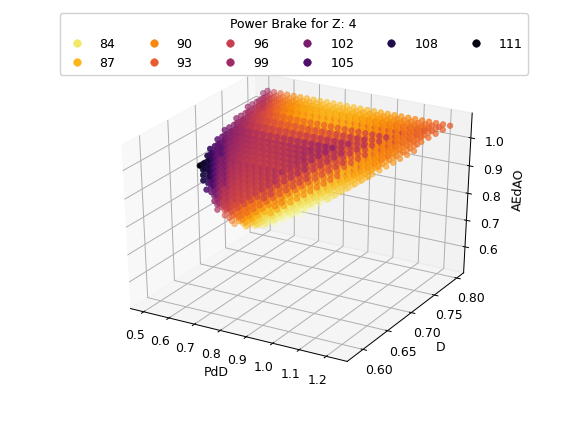

In [13]:
def show_P_B_graph(z):
    fig = plt.figure()
#     fig.set_figwidth(6)
#     fig.suptitle('Z: '+str(z))
    ax = plt.axes(projection='3d')
    df = dfs_P_B[z]
    # Data for three-dimensional scattered points
    xdata = list(df['PdD'])
    ydata = list(df['D'])
    zdata = list(df['AEdAO'])
    cdata = list(df['P_B'])
    ax.set_xlabel('PdD')
    ax.set_ylabel('D')
    ax.set_zlabel('AEdAO')
    
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='cool', linewidth=0.5)
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='Accent', linewidth=0.5)
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='viridis_r', linewidth=0.5)
    g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='inferno_r', linewidth=0.5)
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='gnuplot_r', linewidth=0.5)
    
    legend = ax.legend(*g.legend_elements(),
                       loc="upper center", borderaxespad=-3,
                       title="Power Brake for Z: "+str(z),
                       ncol=6) 
    ax.add_artist(legend);
    
show_P_B_graph(4)

In [14]:
df_all = pd.concat([dfs_P_B[z] for z in dfs_P_B], ignore_index=True)
# remove duplicates keeping the smaller P_B
df_all = df_all.sort_values(['P_B'], ascending=True)
df_all = df_all.drop_duplicates(['D', 'AEdAO', 'PdD'])

<IPython.core.display.Javascript object>


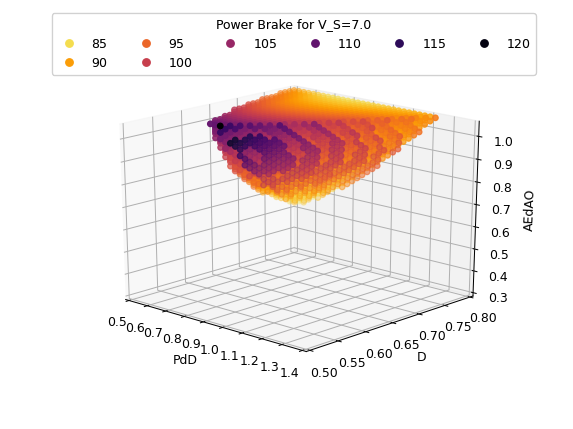

In [16]:
# Plot showing all the range of variables

fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
xdata = list(df_all['PdD'])
ax.set_xlabel('PdD')
ax.set_xlim(range_PdD)
ydata = list(df_all['D'])
ax.set_ylabel('D')
ax.set_ylim(range_D)
zdata = list(df_all['AEdAO'])
ax.set_zlabel('AEdAO')
ax.set_zlim(range_AEdAO)
# color data
cdata = list(df_all['P_B'])

g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='inferno_r');
# ax.set_facecolor("gray")

legend = ax.legend(*g.legend_elements(),
                   loc="upper center", borderaxespad=-3,
                   title="Power Brake for V_S="+V_S[0]+'.'+V_S[2],
                   ncol=6) 
ax.add_artist(legend);

ax.view_init(20, -47)
# ax.view_init(20, -135)

With zoom


<IPython.core.display.Javascript object>


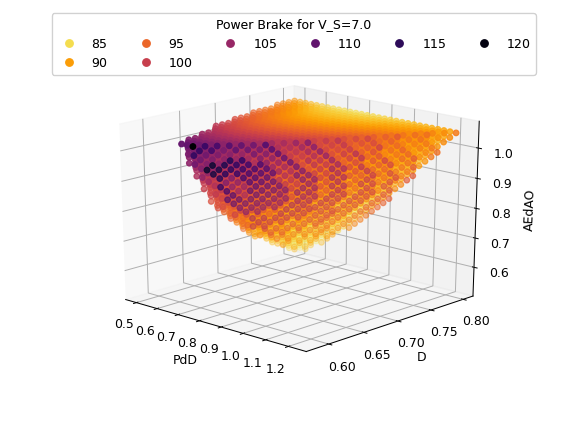

In [19]:
print("With zoom")

fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
xdata = list(df_all['PdD'])
ax.set_xlabel('PdD')
ydata = list(df_all['D'])
ax.set_ylabel('D')
zdata = list(df_all['AEdAO'])
ax.set_zlabel('AEdAO')
# color data
cdata = list(df_all['P_B'])

g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='inferno_r');
# ax.set_facecolor("gray")

legend = ax.legend(*g.legend_elements(),
                   loc="upper center", borderaxespad=-3,
                   title="Power Brake for V_S="+V_S[0]+'.'+V_S[2],
                   ncol=6) 
ax.add_artist(legend);

ax.view_init(20, -47)
# ax.view_init(20, -135)